# Credit default prediction
# Name : Sajin Raj Amatya 

# 1. Importing necessary libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  RandomizedSearchCV

# 2. Data loading 

In [4]:
# loading the excel file using read_excel() of pandas 
df_default_credit = pd.read_excel("defaultofcreditcard.xls",header=1)

# 3. Data understanding 

## 3.1 First five row of the dataframe

In [8]:
pd.set_option('display.max_columns', None) # display all the columns 
df_default_credit.head() # display first five row of the dataframe


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3.2 last five row of the dataframe

In [10]:
df_default_credit.tail() # display last five rows of the dataset 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## 3.3 Random 10 rows of the dataframe

In [12]:
df_default_credit.sample(10) #Display random 10 rows for the dataframe 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
14072,14073,320000,1,1,1,43,-1,0,0,0,0,0,18625,28143,32159,31851,3105,-45,10000,5000,0,0,0,0,1
8026,8027,190000,1,3,1,50,0,0,0,2,0,0,106410,108770,115325,112063,114484,121179,5491,9800,0,4300,8700,4500,0
29121,29122,290000,2,3,1,50,1,2,2,2,2,0,173564,176233,171993,183510,179061,182891,7000,0,14367,0,6700,7000,0
13067,13068,50000,2,1,2,30,0,0,0,2,2,2,19930,36105,29604,27764,28656,29087,28019,13000,0,2000,1000,5000,0
25509,25510,60000,2,1,2,25,0,0,0,0,0,0,56136,57280,56969,58695,57453,61153,2100,2100,2685,2300,4800,3400,0
29940,29941,20000,1,2,1,48,1,2,0,0,0,0,20733,20109,20126,18928,18761,18787,2,2019,11309,2000,700,1002,0
7686,7687,390000,2,2,2,28,-1,-1,-1,-1,-1,-1,1421,1286,2123,2219,1205,3343,1294,2133,2230,1209,3365,2151,0
13064,13065,30000,2,2,2,23,0,0,0,0,2,0,22517,24148,25437,28391,27801,28684,2000,2000,3700,0,1500,1500,0
4653,4654,10000,2,1,1,27,2,0,0,0,0,2,4920,5937,6945,7088,8108,8264,1256,1264,407,1291,435,0,0
1472,1473,360000,1,1,1,36,0,0,-1,0,0,0,40434,13352,129978,150637,138969,132118,2000,129990,30000,25000,5000,3000,0


## 3.4 Columns of the dataframe

In [14]:
df_default_credit.columns # Columns of the dataframe 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## 3.5 Number of rows and columns

In [16]:
df_default_credit.shape # Number of rows and columns in dataframe 

(30000, 25)

#### Total rows : 30000 and Total Columns : 25

## 3.6 Datatype of each columns 

In [19]:
df_default_credit.dtypes # Data type of each columns in the dataframe 

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## 3.7 Information about each columns 

In [21]:
df_default_credit.info() # Information regarding each columns in the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## 3.8 Statistical Summary of each columns 

In [23]:
df_default_credit.describe() # perform and display statistical summary of each columns which includes mean, standard deviation,max and min values, quartiles, count 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 3.9 Inspection of missing values 

In [25]:
df_default_credit.isna().sum() # Inspection of missing values 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 3.10 Inspection of duplicate values 

In [27]:
df_default_credit.duplicated().sum() # counting the number of duplicates values 

np.int64(0)

## 3.11 Unique values of Education columns 

In [29]:
  df_default_credit['EDUCATION'].value_counts() # unique values and their frequency count  of the EDUCATION columns 

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

#### Education columns value indication  = 1 : graduate school , 2: university. 3: high school, 4 : others 
#### 5,6 and 0 are unknown


## 3.12 Unique values of Marriage columns 

In [32]:
df_default_credit['MARRIAGE'].value_counts() # unique values and their frequency count  of the MARRIAGE columns 

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

#### MARRIAGE columns values indication:  1 = married, 2 = single and 3 = others. 0 values is unknown

## 3.13 Unique values of Gender columns 

In [35]:
df_default_credit['SEX'].value_counts() # unique values and their frequency count  of the GENDER columns 

SEX
2    18112
1    11888
Name: count, dtype: int64

#### Gender columns indication  1: male and 2 : Female

## 3.14 Maximum and Minimum AGE of defaulter 

In [38]:
max_age = df_default_credit['AGE'].max() # maximum age of the defaulter in dataset 
min_age = df_default_credit['AGE'].min() # minimum age of the defaulter in dataset
print("maximum age:", max_age)
print("minimum age:", min_age)

maximum age: 79
minimum age: 21


#### Row details of the maximum age

In [40]:
df_default_credit[df_default_credit['AGE'] == max_age]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
18245,18246,440000,1,1,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800,16531,15677,0


#### Number of rows with the minimum age in dataset

In [42]:
df_default_credit[df_default_credit['AGE'] == min_age].shape[0]

67

#### There are total of 67 row with the minimum age of 21 

## 3.15) Unique Values of the columns PAY0 to PAY_6

In [45]:
# apply the aggreation function to count the unique values of the each columns PAY
PAY0_to_PAY6 = df_default_credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.Series.value_counts )
# map the index values to the dataset desciption 
PAY0_to_PAY6.index = PAY0_to_PAY6.index.map({
    0:0,
    -2:-2,
    -1: 'Paid duly',
    1: 'Payment delayed for one month',
    2: 'Payment delayed for two months',
    3: 'Payment delayed for three months',
    4: 'Payment delayed for four months',
    5: 'Payment delayed for five months',
    6: 'Payment delayed for six months',
    7: 'Payment delayed for seven months',
    8: 'Payment delayed for eight months',
    9: 'Payment delayed for nine months and above'
})

PAY0_to_PAY6

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2759,3782,4085,4348,4546.0,4895.0
Paid duly,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
Payment delayed for one month,3688,28,4,2,NaN,NaN
Payment delayed for two months,2667,3927,3819,3159,2626.0,2766.0
Payment delayed for three months,322,326,240,180,178.0,184.0
Payment delayed for four months,76,99,76,69,84.0,49.0
Payment delayed for five months,26,25,21,35,17.0,13.0
Payment delayed for six months,11,12,23,5,4.0,19.0
Payment delayed for seven months,9,20,27,58,58.0,46.0


#### The indication of -2 and 0 is not mentioned and in data description but, from further research it indicates that -2 is no consumption of credit and 0 is minimum amount paid  

## 3.16 Unique values of Target variable 

In [48]:
df_default_credit['default payment next month'].value_counts() # Unique values and their frequency count of target variable


default payment next month
0    23364
1     6636
Name: count, dtype: int64

#### values indication:  0 = no default payment  and 1 = default payment  

# 4) EDA

## 4.1 ) Univariate analysis 

### 4.1.1) Gender distribution in the dataset 

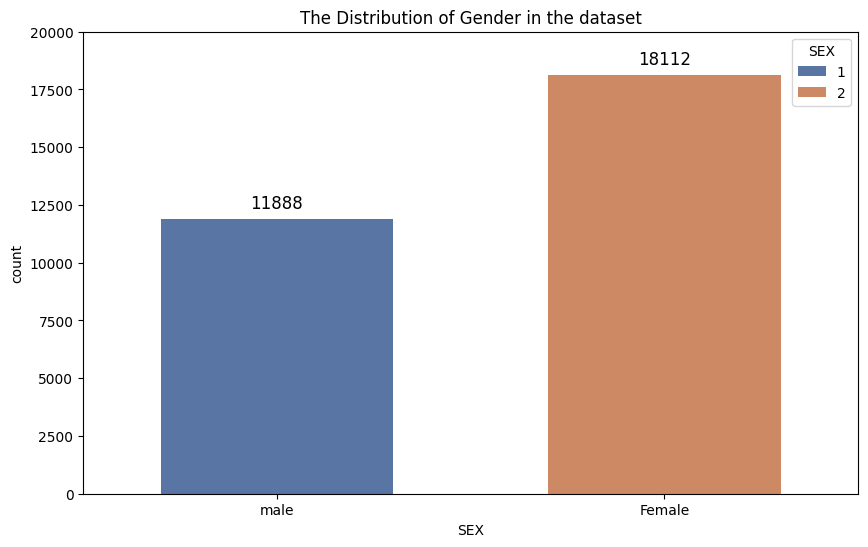

In [53]:

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_default_credit, x='SEX',palette='deep',width=0.6,hue='SEX')
ax.bar_label(ax.containers[0], fontsize=12, padding=5)  # adding bar label 
ax.bar_label(ax.containers[1], fontsize=12, padding=5)  # adding bar label 
plt.title("The Distribution of Gender in the dataset")
plt.xticks(ticks=[0,1],labels=["male",'Female'])
plt.ylim(0,20000)
plt.show()

### 4.1.2) Distribution of values of marriage columns 

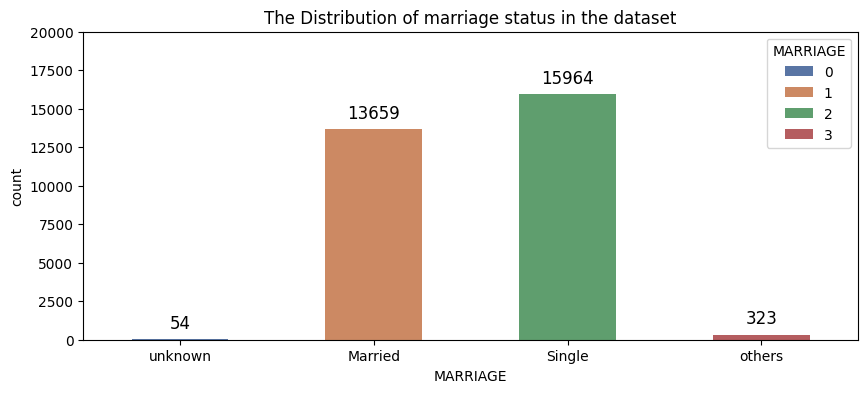

In [55]:

plt.figure(figsize=(10,4))
ax = sns.countplot(data=df_default_credit, x='MARRIAGE',palette='deep',width=0.5,hue="MARRIAGE")
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=5)
plt.title("The Distribution of marriage status in the dataset")
plt.xticks(ticks=[0,1,2,3],labels=["unknown",'Married',"Single","others"])
plt.ylim(0,20000)
plt.show()

### 4.1.3)  Distribution of values of target variable default vs no default

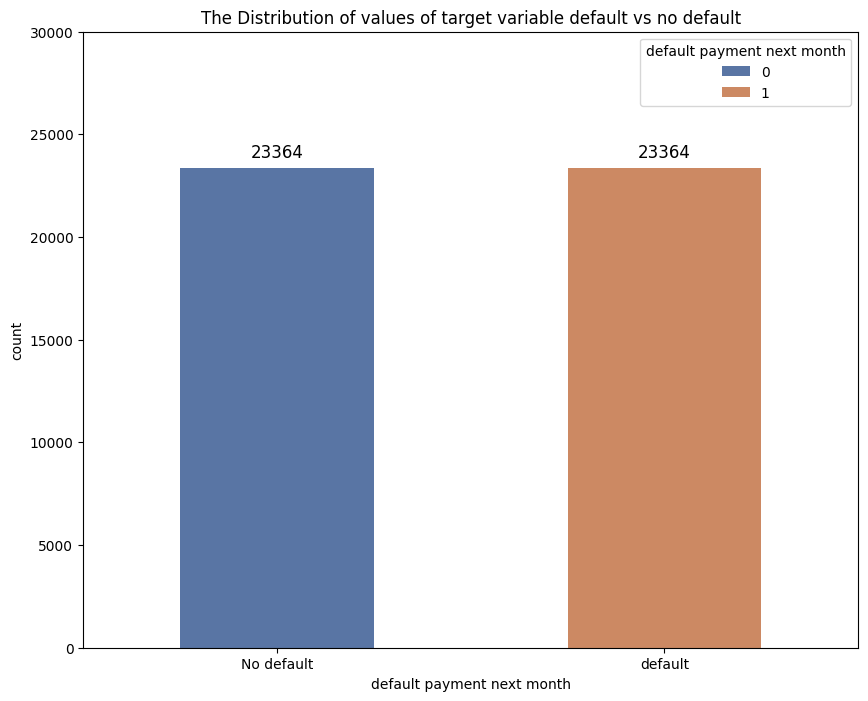

In [117]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df_default_credit, x='default payment next month',palette='deep',width=0.5,hue='default payment next month')
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=5) 
plt.title("The Distribution of values of target variable default vs no default")
plt.xticks(ticks=[0,1],labels=["No default",'default'])
plt.ylim(0,30000)
plt.show()

### 4.1.4) Distribution of EDUCATION columns

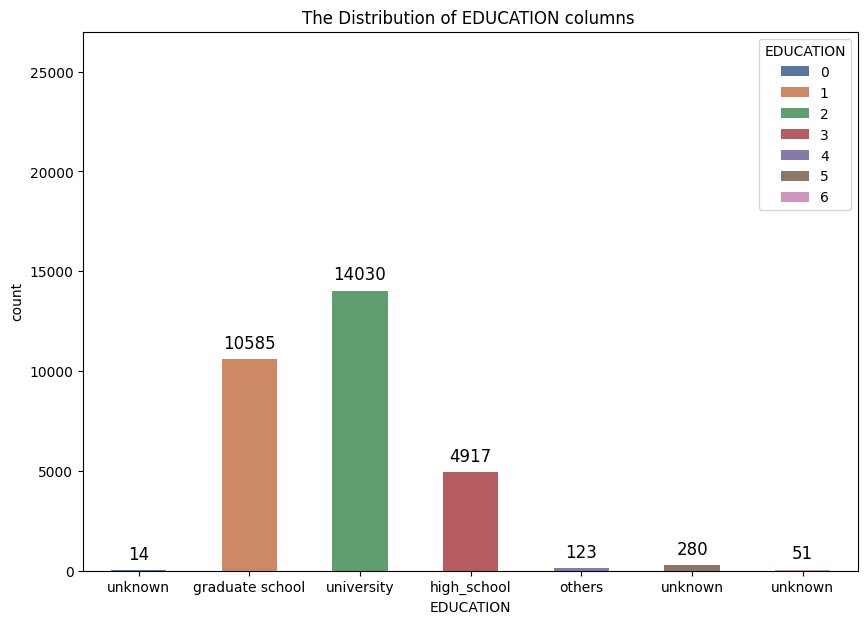

In [59]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df_default_credit, x='EDUCATION',palette='deep',width=0.5,hue='EDUCATION')
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=5)
plt.title("The Distribution of EDUCATION columns ")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["unknown",'graduate school','university','high_school','others','unknown','unknown'])
plt.ylim(0,27000)
plt.show()

### 4.1.5) Histogram of age columns 

Text(0.5, 1.0, 'Histogram of the age column')

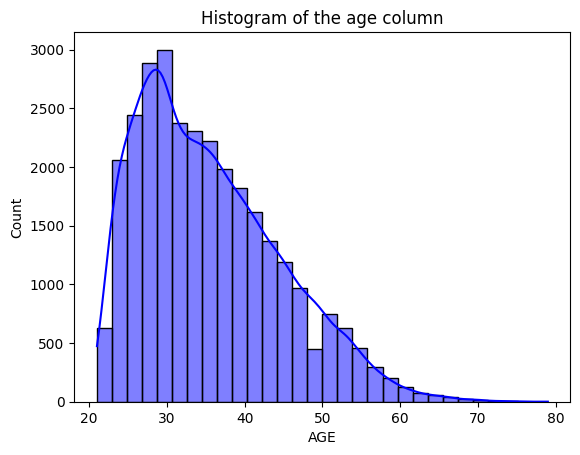

In [61]:
# histogram seaborn 
sns.histplot(df_default_credit['AGE'], kde=True, bins=30, color='blue')
plt.title("Histogram of the age column")

### 4.1.6)  Histogram of column BILL_AMT1 to BILL_AMT6

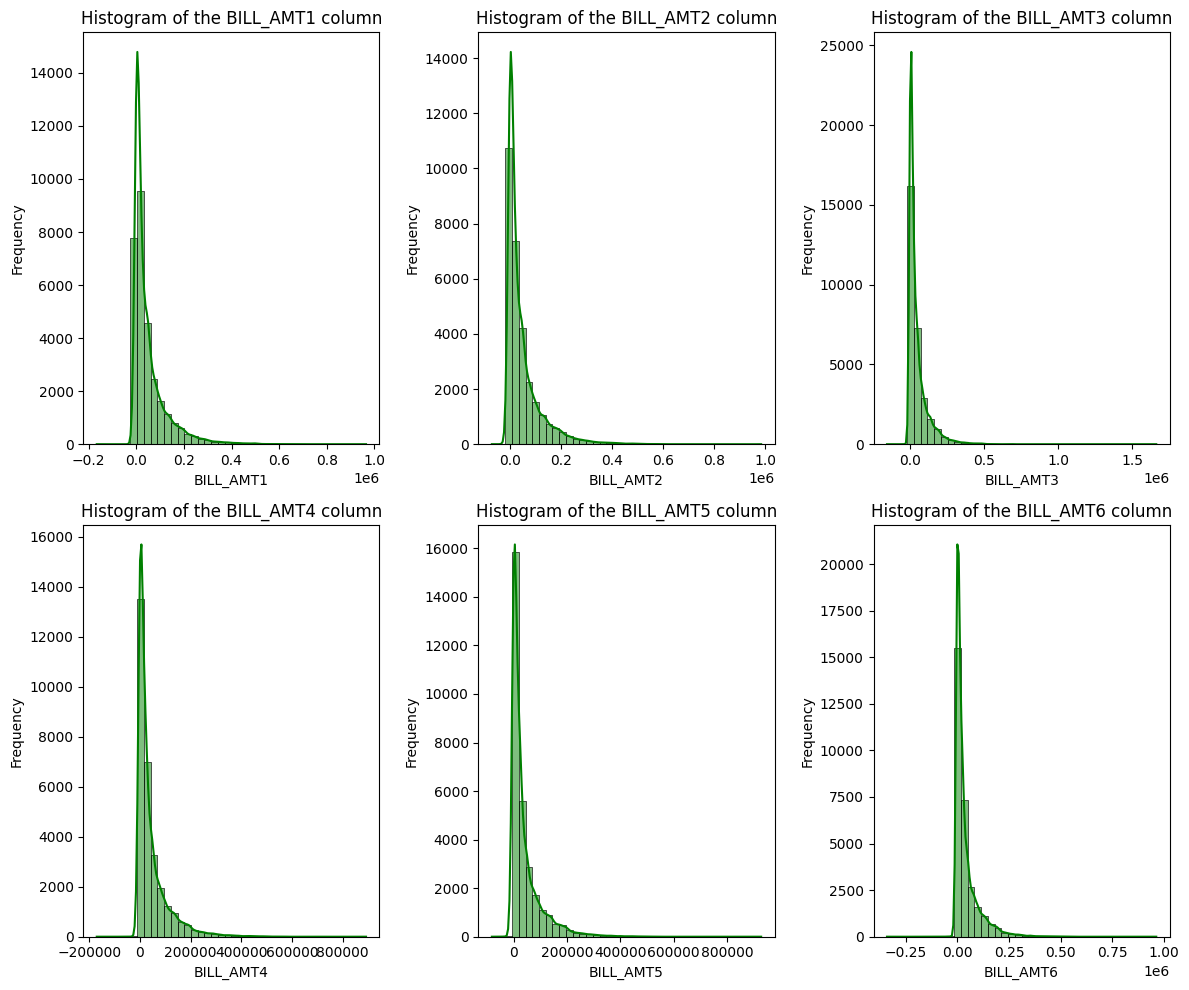

In [63]:

BILL_AMT = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6']
# Set up the figure and subplots
fig, ax = plt.subplots(2, 3, figsize=(12, 10))  # 2 rows, 2 columns
for i, column in enumerate(BILL_AMT, 1):  
    plt.subplot(2,3, i)  
    sns.histplot(df_default_credit[column], kde=True, bins=40, color='green')
    plt.title(f"Histogram of the {column} column")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### 4.1.7) Histogram of all PAY_AMT columns 

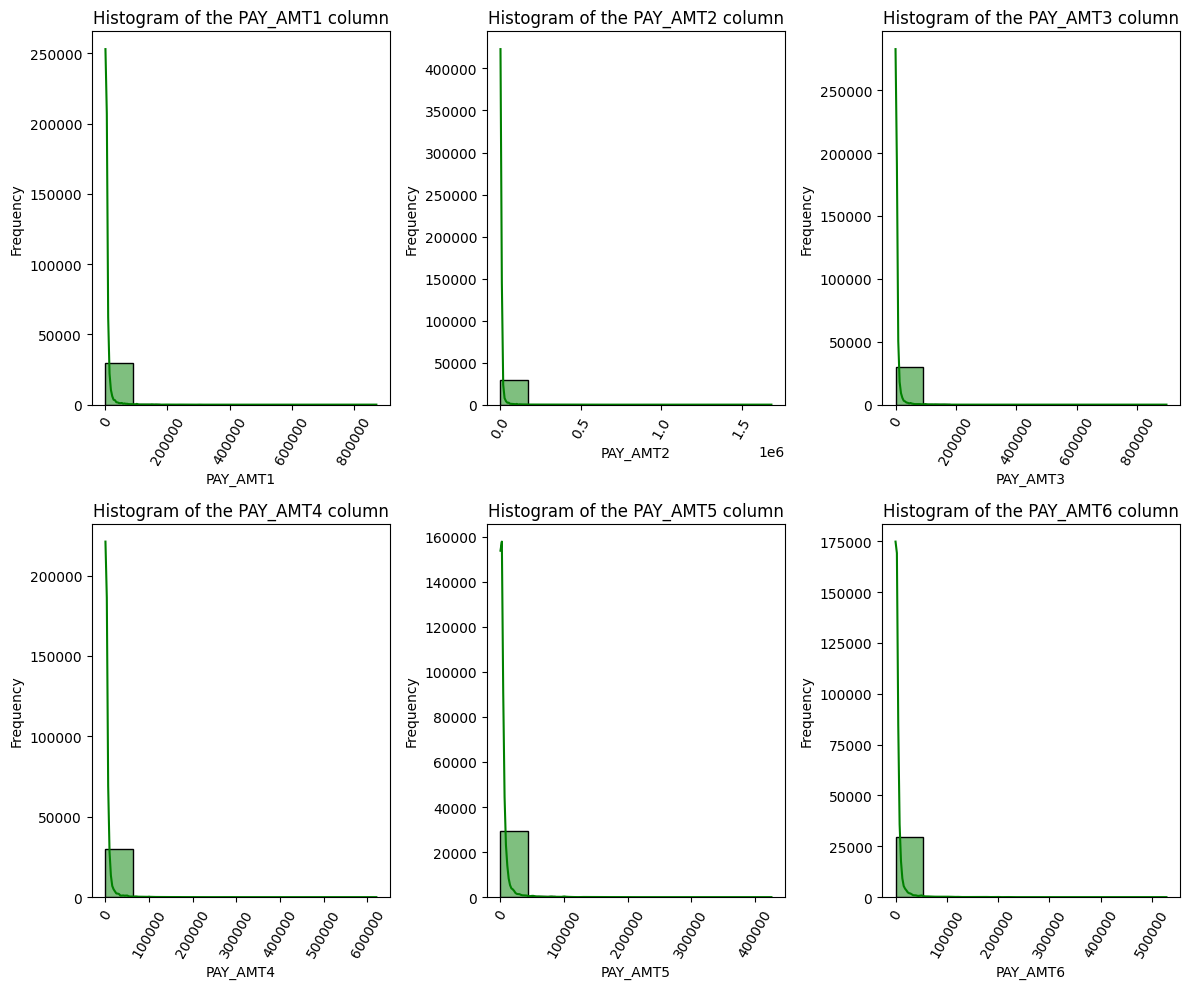

In [65]:

# List of columns to plot
BILL_AMT = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']

# Set up the figure and subplots
fig, ax = plt.subplots(2, 3, figsize=(12, 10))  # 2 rows, 2 columns


for i, column in enumerate(BILL_AMT, 1):  
    plt.subplot(2,3, i)  
    sns.histplot(df_default_credit[column], kde=True, bins=10, color='green')
    plt.title(f"Histogram of the {column} column")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation = 60)

plt.tight_layout()
plt.show()


### 4.1.8 Histogram of the Limit balance column

Text(0.5, 1.0, 'Histogram of the Limit balance column')

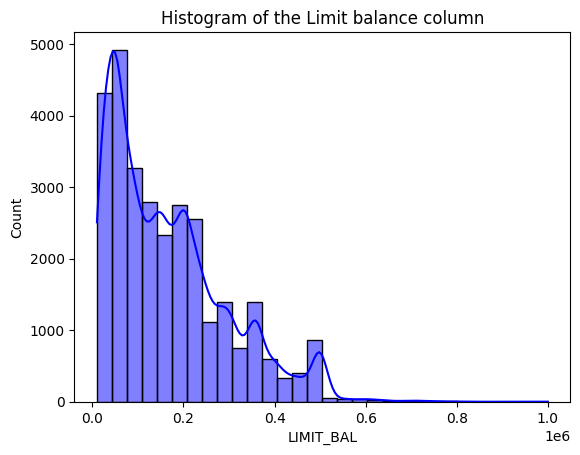

In [67]:
sns.histplot(df_default_credit['LIMIT_BAL'], kde=True, bins=30, color='blue')
plt.title("Histogram of the Limit balance column")

## 4.2 Bivariate

### 4.2.1 Number of credit card Default status based on gender  in the dataset

Text(0.5, 1.0, 'Number of credit card Default status based on gender  in the dataset')

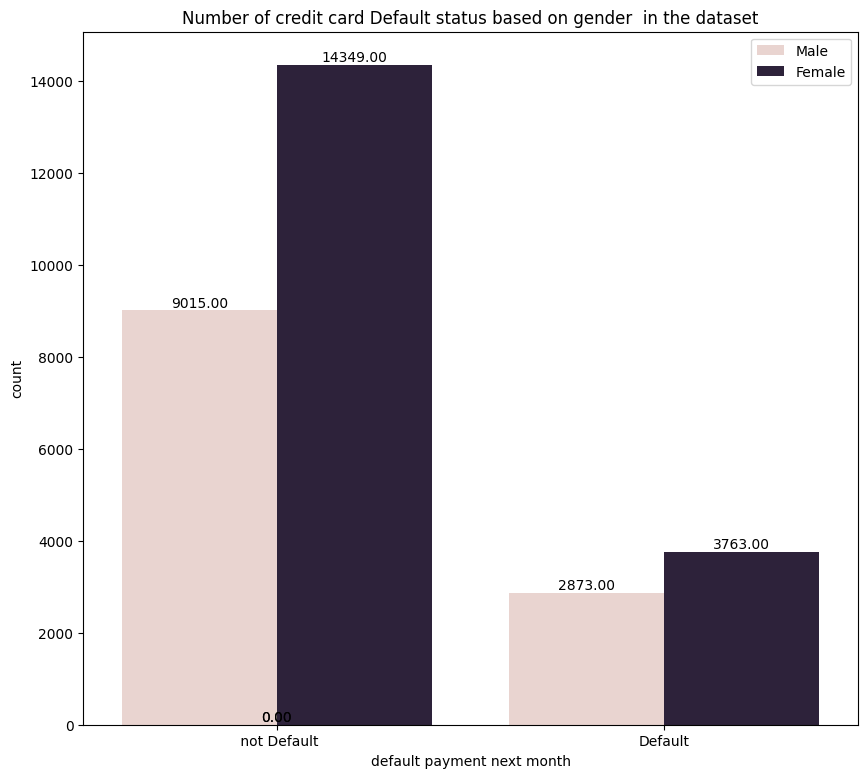

In [70]:
plt.figure(figsize=(10,9))
ax = sns.countplot(data=df_default_credit, x='default payment next month',hue="SEX")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format height with 2 decimal places (optional)
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.xticks(ticks=[0, 1], labels=[' not Default', 'Default'])
plt.title("Number of credit card Default status based on gender  in the dataset")


### 4.2.2 Number of credit card Default status based on marriage

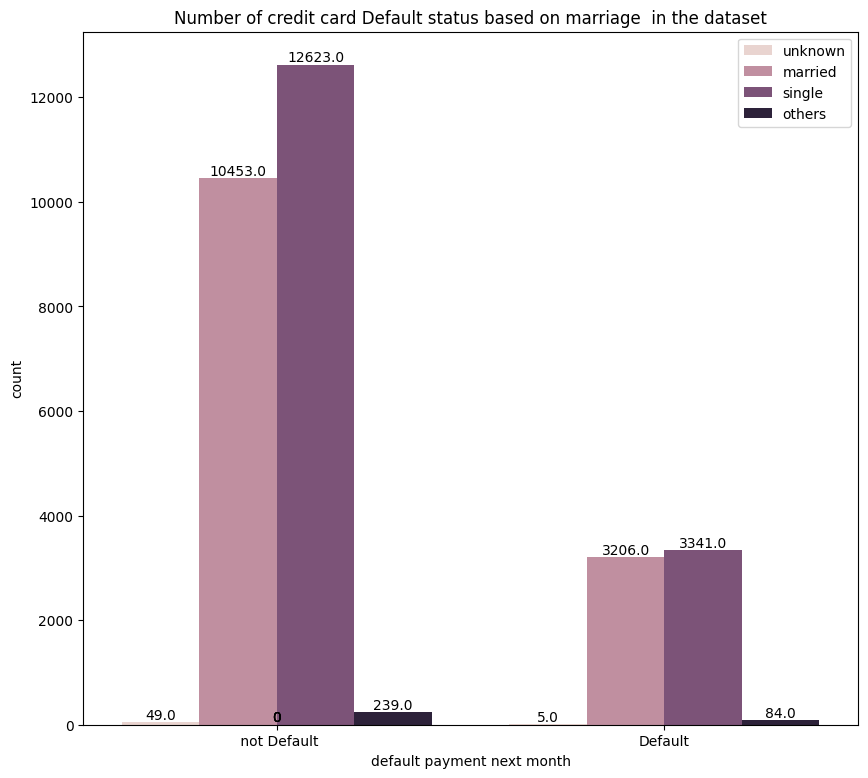

In [72]:
plt.figure(figsize=(10,9))
ax = sns.countplot(data=df_default_credit, x='default payment next month',hue="MARRIAGE")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['unknown', 'married','single','others'])
plt.xticks(ticks=[0, 1], labels=[' not Default', 'Default'])
plt.title("Number of credit card Default status based on marriage  in the dataset")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  (p.get_x() + p.get_width() / 2, p.get_height()),ha='center', va='bottom')

### 4.2.3 Heat Map

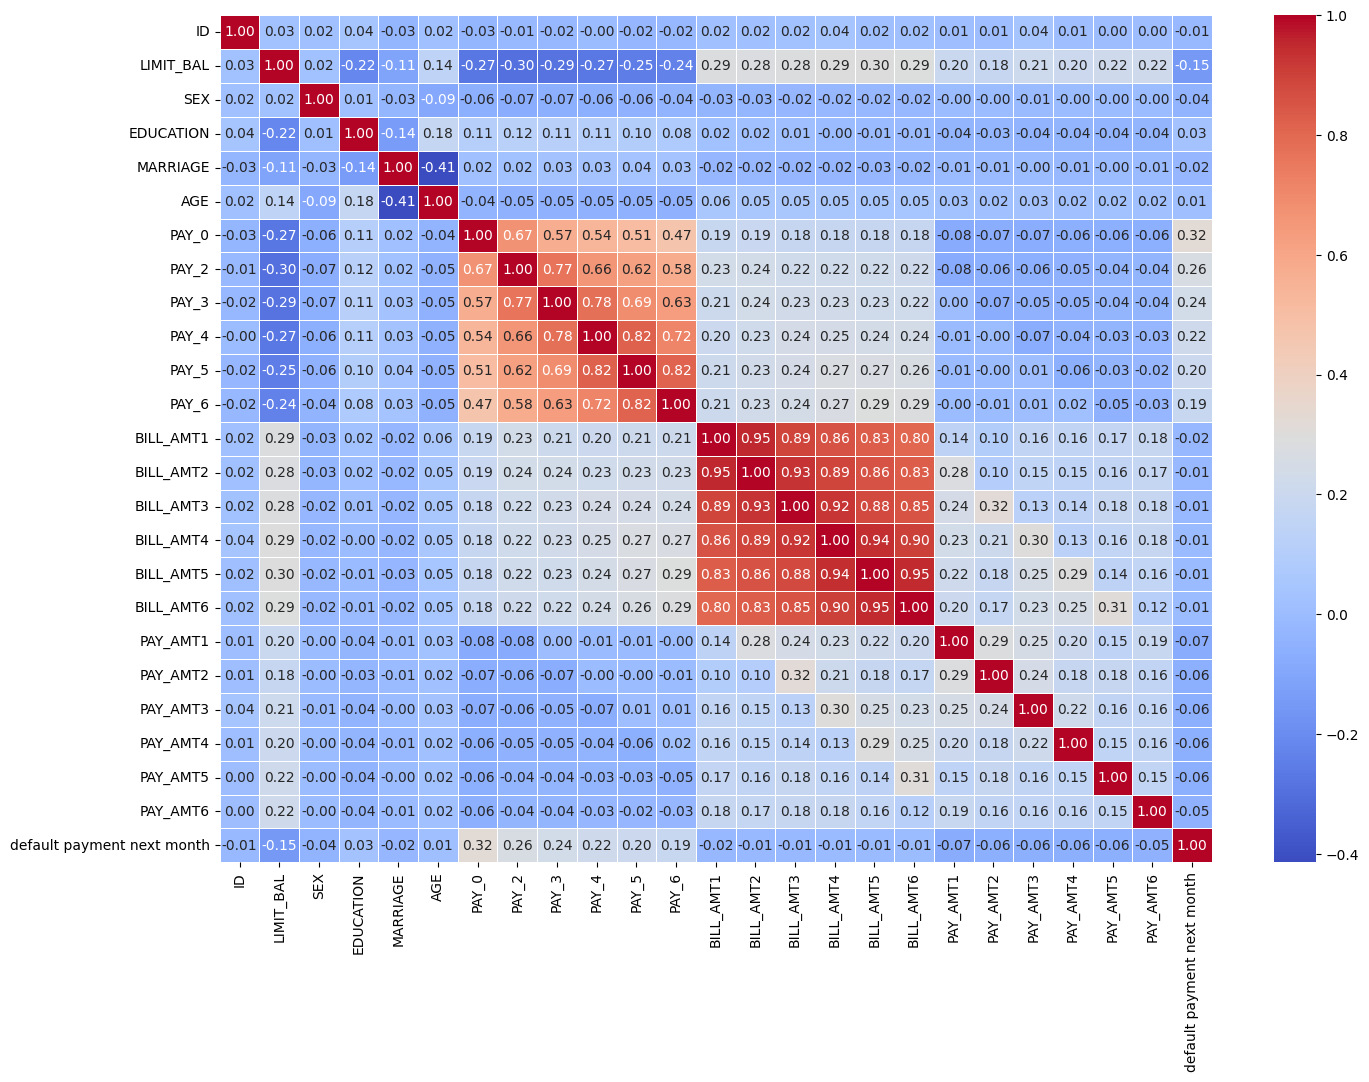

In [74]:
correlation_matrix = df_default_credit.corr()
plt.figure(figsize=(16, 11))  # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

### 4.2.4 Number of credit card default status based on Education status 

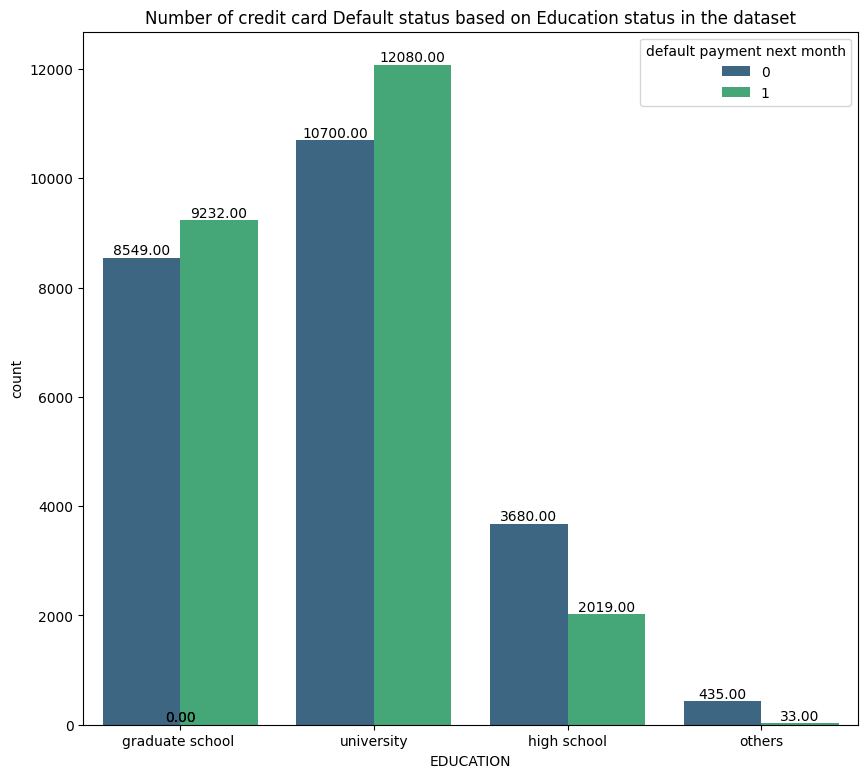

In [115]:
plt.figure(figsize=(10,9))
ax = sns.countplot(data=df_default_credit, x='EDUCATION',hue="default payment next month",palette = "viridis")



plt.xticks(ticks=[0,1,2,3], labels=['graduate school ', 'university','high school','others'])
plt.title("Number of credit card Default status based on Education status in the dataset")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# 5 Data preprocessing 

## 5.1) Replacing the '0' values of Marriage to '3' other as it is not specified and unknown

In [6]:
df_default_credit['MARRIAGE'] = df_default_credit['MARRIAGE'].replace({0:3})

### 5.2) Replacing the unknown values 0,5,6 of education columns to other '4'

In [9]:
df_default_credit['EDUCATION'] = df_default_credit['EDUCATION'].replace({0:4,5:4,6:4})
df_default_credit['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

## 5.3) Removing unwanted columns 

In [12]:
df_default_credit = df_default_credit.drop(columns=['ID'])

## 5.4 ) Over sampling the miniorty class using smote 

In [15]:

X_initial = df_default_credit.drop(columns=['default payment next month'])
y_initial = df_default_credit['default payment next month']
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_initial, y_initial)

X_smote_df_default_credit = pd.DataFrame(X_smote, columns=X_initial.columns)
y_smote_df_default_credit = pd.DataFrame(y_smote, columns=['default payment next month'])

df_default_credit = pd.concat([X_smote_df_default_credit, y_smote_df_default_credit], axis=1)
df_default_credit.shape

(46728, 24)

## 5.6) one hot encoding 

In [18]:
df_default_credit_encoded = pd.get_dummies(df_default_credit, columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

## 5.7) Data scaling 

In [21]:

X = df_default_credit_encoded.drop(columns=['default payment next month'])  # Features
y = df_default_credit_encoded['default payment next month']  # Target

standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
df_default_credit_scale = pd.concat([X_scaled_df, y], axis=1)


# 6) Feature variable and target variable separation 

In [24]:
X = df_default_credit_scale.drop(columns=['default payment next month'])
y = df_default_credit_scale['default payment next month']

# 7) Splitting the data into training and test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
y_train.value_counts()

default payment next month
0    18700
1    18682
Name: count, dtype: int64

# 8) Logistic regression 

##  model initialization 

In [97]:
logistic_regression_model = LogisticRegression(solver= 'liblinear', penalty= 'l2', max_iter = 1500, C = 0.01)


## Training the logisitc regression model 

In [99]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1500, solver='liblinear')

In [100]:
y_pred_logistic_train = logistic_regression_model.predict(X_train)
classification_logistic_train = classification_report(y_train, y_pred_logistic_train)
print(classification_logistic_train)

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     18700
           1       0.79      0.69      0.73     18682

    accuracy                           0.75     37382
   macro avg       0.76      0.75      0.75     37382
weighted avg       0.76      0.75      0.75     37382



## Prediction in testing data 

In [102]:
y_pred_logistic_test = logistic_regression_model.predict(X_test)

In [103]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic_test)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic_test)
classification_logistic = classification_report(y_test, y_pred_logistic_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion_matrix_logistic)
print("Classification Report:\n", classification_logistic)

Accuracy: 0.7406377059704686
Confusion Matrix:
 [[3816  848]
 [1576 3106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      4664
           1       0.79      0.66      0.72      4682

    accuracy                           0.74      9346
   macro avg       0.75      0.74      0.74      9346
weighted avg       0.75      0.74      0.74      9346



## Hyper parameter tuning for logistic regression 

In [105]:

param_logistic_regression = {
    'C': [0.01,0.05,0.1,0.5,1,1.5]  ,   
    'max_iter': [1500, 2000],      
    'penalty': ['l1', 'l2'],      
    'solver': ['liblinear', 'saga'] 
}
random_search_logistic_regression = RandomizedSearchCV(
    estimator=logistic_regression_model,
    param_distributions=param_logistic_regression,
    scoring='f1',  
    cv=5,               
    n_jobs=-1,     
    random_state=42, 
    n_iter=10     
)
random_search_logistic_regression.fit(X_train, y_train)
best_logistic_regression_model = random_search_logistic_regression.best_estimator_
y_pred_lr = best_logistic_regression_model.predict(X_test)
print("Best Hyperparameters for Logistic Regression:", random_search_logistic_regression.best_params_)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1500, 'C': 0.5}

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      4664
           1       0.79      0.66      0.72      4682

    accuracy                           0.74      9346
   macro avg       0.75      0.74      0.74      9346
weighted avg       0.75      0.74      0.74      9346



## Confusion matrix for logistic regression 

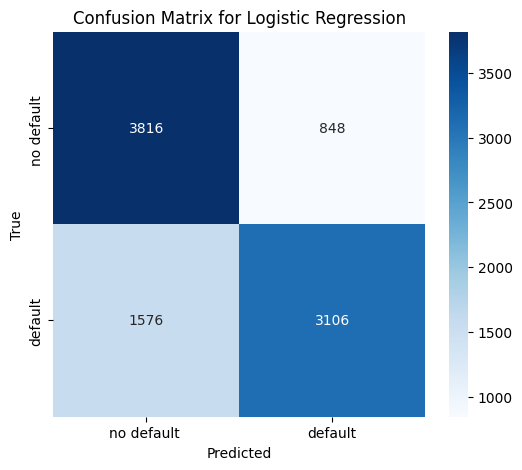

In [107]:

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['no default ', 'default'], yticklabels=['no default ', 'default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 9) Random forest model 

## Random forest model initialization 

In [108]:
random_forest_model = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth= 30)

## Training Random forest model in training dataset 

In [111]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=1000)

In [112]:
y_pred_random_forest_train = random_forest_model.predict(X_train)
accuracy_Random_forest_classifier = accuracy_score(y_train, y_pred_random_forest_train)
accuracy_Random_forest_classifier 

0.998769461238029

## Random forest model prediction in test data 

In [103]:
y_pred_random_forest_test = random_forest_model.predict(X_test)

## Evaluation metric for Random forest classifier 

In [106]:
accuracy_Random_forest_classifier = accuracy_score(y_test, y_pred_random_forest_test)
confusion_matrix_Random_forest_classifier = confusion_matrix(y_test, y_pred_random_forest_test)
classification_Random_forest_classifier = classification_report(y_test, y_pred_random_forest_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_Random_forest_classifier)
print("Confusion Matrix:\n", confusion_matrix_Random_forest_classifier)
print("Classification Report:\n", classification_Random_forest_classifier)

Accuracy: 0.7693130751123475
Confusion Matrix:
 [[3878  786]
 [1370 3312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      4664
           1       0.81      0.71      0.75      4682

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346



## Confusion matrix for Random forest classifer  

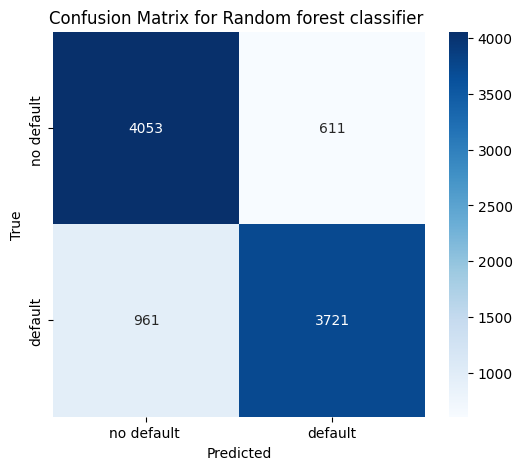

In [118]:

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_Random_forest_classifier, annot=True,fmt='d', cmap='Blues', xticklabels=['no default ', 'default'], yticklabels=['no default ', 'default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random forest classifier ')
plt.show()

## Hyper parameter tuning Random forest classifier


In [120]:

param_random_forest_model = {
    'n_estimators': [200, 500,1000],        
    'max_features': ['sqrt', 'log2'],     
    'max_depth': [None, 10, 30],      
    'min_samples_split': [2, 4,8],            
    'min_samples_leaf': [1, 2,4],              
}

random_search_random_forest = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_random_forest_model,
    scoring='f1',  
    cv=5,          
    n_jobs=-1,    
    random_state=42,  
    n_iter=10       
)


random_search_random_forest.fit(X_train, y_train)
best_randomforest_model = random_search_random_forest.best_estimator_
y_pred_rf = best_randomforest_model.predict(X_test)

print("Best Hyperparameters for Random Forest Classifier:", random_search_random_forest.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Best Hyperparameters for Random Forest Classifier: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      4664
           1       0.86      0.80      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



# 10) Support Vector machine Classifier 

## SVC model initialization

In [36]:
svm_classify_model = SVC()

## SVC model training in train dataset

In [39]:
svm_classify_model.fit(X_train, y_train)

SVC()

## SVC Model prediction on test data 

In [47]:
y_pred_svm = svm_classify_model.predict(X_test)

## Model Evaluation for SVC Model

In [49]:
accuracy_svm_classifier = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm_classifier = confusion_matrix(y_test, y_pred_svm)
classification_svm_classifier = classification_report(y_test,y_pred_svm)

# Print the evaluation metrics
print("Accuracy:", accuracy_svm_classifier)
print("Confusion Matrix:\n", confusion_matrix_svm_classifier)
print("Classification Report:\n", classification_svm_classifier)

Accuracy: 0.7642841857479136
Confusion Matrix:
 [[3915  749]
 [1454 3228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78      4664
           1       0.81      0.69      0.75      4682

    accuracy                           0.76      9346
   macro avg       0.77      0.76      0.76      9346
weighted avg       0.77      0.76      0.76      9346



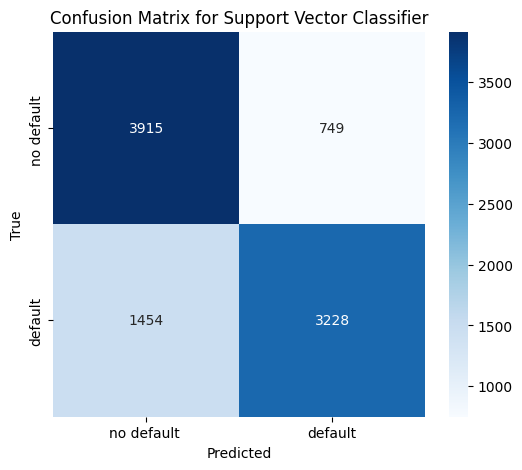

In [52]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_svm_classifier,fmt='d', annot=True, cmap='Blues', xticklabels=['no default ', 'default'], yticklabels=['no default ', 'default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

## Initialization of base learner model for voting classifier

In [44]:
base_learners = [ 
    ('svc', SVC(kernel='linear', probability=True)),
    ('LR', LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter=1500, C=0.5))  ,
    ('RF',RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth= None))
]




## Votting classifier model

In [47]:

voting_clf = VotingClassifier(
    estimators=base_learners,
    voting='soft', 
    n_jobs=-1       
)



## Fit the voting classifier model

In [49]:

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('svc', SVC(kernel='linear', probability=True)),
                             ('LR',
                              LogisticRegression(C=0.5, max_iter=1500,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('RF',
                              RandomForestClassifier(max_features='log2',
                                                     n_estimators=1000))],
                 n_jobs=-1, voting='soft')

In [51]:
y_pred = voting_clf.predict(X_test)
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      4664
           1       0.82      0.73      0.77      4682

    accuracy                           0.79      9346
   macro avg       0.79      0.79      0.79      9346
weighted avg       0.79      0.79      0.79      9346

